In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdw
from sklearn.model_selection import train_test_split, GridSearchCV, GroupKFold
from photutils.utils import ShepardIDWInterpolator
import time
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import skgstat as skg

# SR0

In [10]:
cv_score_SR0_200_val = {
        "Validation Score RMSE": 0.4744,
        "Validation Score ME": -0.0134,
        "Validation Score MAE": 0.3582,
        "Validation Score R Squared": 0.7684,
        "Validation Score DKL": 3.3017
}
cv_score_SR0_400_val = {
        "Validation Score RMSE":0.3576,
        "Validation Score ME": -0.0308,
        "Validation Score MAE": 0.2615,
        "Validation Score R Squared": 0.8684,
        "Validation Score DKL": 2.7375
}
cv_score_SR0_600_val = {
        "Validation Score RMSE":0.2991,
        "Validation Score ME": -0.0270,
        "Validation Score MAE": 0.2209,
        "Validation Score R Squared": 0.9079,
        "Validation Score DKL": 2.4922
}
cv_score_SR0_800_val = {
        "Validation Score RMSE":0.2677,
        "Validation Score ME": -0.0363,
        "Validation Score MAE": 0.1993,
        "Validation Score R Squared": 0.9262,
        "Validation Score DKL": 2.3220
}
cv_score_SR0_1000_val = {
        "Validation Score RMSE":0.2344,
        "Validation Score ME": -0.0232,
        "Validation Score MAE": 0.1756,
        "Validation Score R Squared":0.9434,
        "Validation Score DKL": 2.1822
}
cv_score_SR0_1500_val = {
        "Validation Score RMSE":0.1988,
        "Validation Score ME": -0.0178,
        "Validation Score MAE": 0.1456,
        "Validation Score R Squared":0.9593,
        "Validation Score DKL": 1.9563
}
cv_score_SR0_2000_val = {
        "Validation Score RMSE":0.1619,
        "Validation Score ME": -0.0093,
        "Validation Score MAE": 0.1207,
        "Validation Score R Squared":0.9730,
        "Validation Score DKL": 1.7930
}

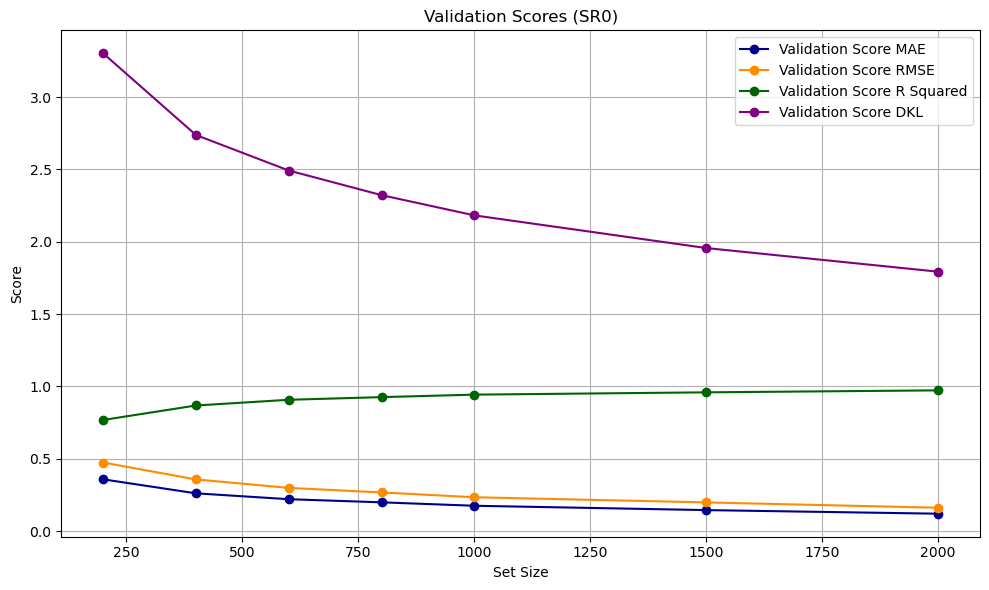

In [8]:
import matplotlib.pyplot as plt

# Define the data structure
data_structures = {
    '200': cv_score_SR0_200_val,
    '400': cv_score_SR0_400_val,
    '600': cv_score_SR0_600_val,
    '800': cv_score_SR0_800_val,
    '1000': cv_score_SR0_1000_val,
    '1500': cv_score_SR0_1500_val,
    '2000': cv_score_SR0_2000_val
}

# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(10, 6))

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  # Extract scores for each set size
    plt.plot(set_sizes, score_values, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Validation Scores (SR0)')
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


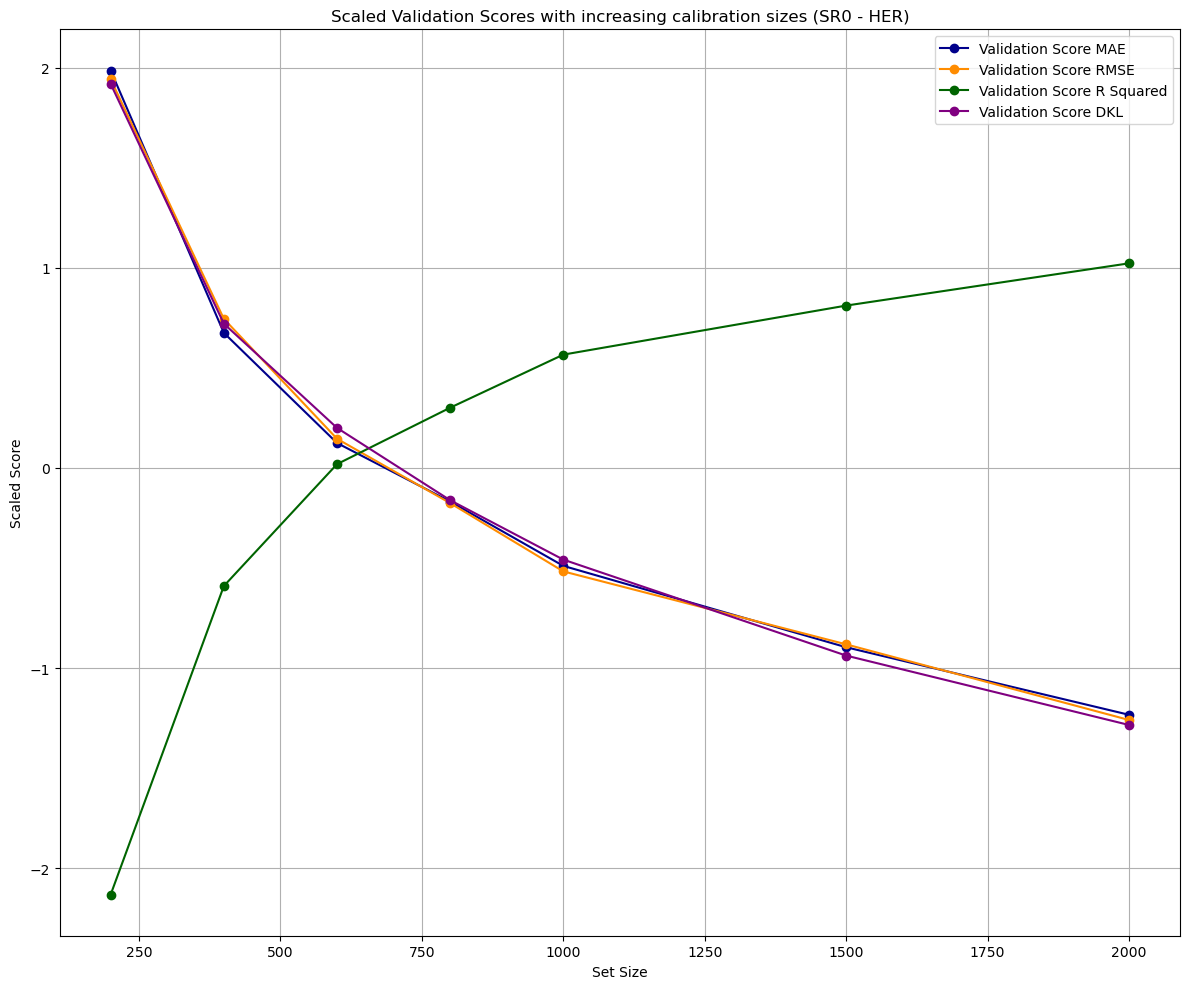

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the data structure
data_structures = {
    '200': cv_score_SR0_200_val,
    '400': cv_score_SR0_400_val,
    '600': cv_score_SR0_600_val,
    '800': cv_score_SR0_800_val,
    '1000': cv_score_SR0_1000_val,
    '1500': cv_score_SR0_1500_val,
    '2000': cv_score_SR0_2000_val
}

# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(12, 10))

# Initialize StandardScaler
scaler = StandardScaler()

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    # Extract scores for each set size and scale them
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  
    scaled_scores = scaler.fit_transform([[value] for value in score_values])
    
    # Plot scaled scores
    plt.plot(set_sizes, scaled_scores, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Scaled Validation Scores with increasing calibration sizes (SR0 - HER)')
plt.xlabel('Set Size')
plt.ylabel('Scaled Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


# SR1

In [7]:
cv_score_SR1_200_val = {
        "Validation Score RMSE": 0.7346,
        "Validation Score ME": 0.0383,
        "Validation Score MAE": 0.5823,
        "Validation Score R Squared": 0.5579,
        "Validation Score DKL": 4.1462
}
cv_score_SR1_400_val = {
        "Validation Score RMSE":0.6833,
        "Validation Score ME": 0.0265,
        "Validation Score MAE": 0.5403,
        "Validation Score R Squared": 0.6175,
        "Validation Score DKL": 3.9785
}
cv_score_SR1_600_val = {
        "Validation Score RMSE":0.6610,
        "Validation Score ME": 0.0137,
        "Validation Score MAE": 0.5201,
        "Validation Score R Squared": 0.6421,
        "Validation Score DKL": 3.8412
}
cv_score_SR1_800_val = {
        "Validation Score RMSE":0.6332,
        "Validation Score ME": -0.0166,
        "Validation Score MAE": 0.5007,
        "Validation Score R Squared": 0.6715,
        "Validation Score DKL": 3.7377
}
cv_score_SR1_1000_val = {
        "Validation Score RMSE":0.6198,
        "Validation Score ME": 0.0053,
        "Validation Score MAE": 0.4853,
        "Validation Score R Squared":0.6853,
        "Validation Score DKL": 3.6867
}
cv_score_SR1_1500_val = {
        "Validation Score RMSE":0.6000,
        "Validation Score ME": 0.0049,
        "Validation Score MAE": 0.4716,
        "Validation Score R Squared":0.7051,
        "Validation Score DKL": 3.6345
}
cv_score_SR1_2000_val = {
        "Validation Score RMSE":0.5711,
        "Validation Score ME": 0.0101,
        "Validation Score MAE": 0.4525,
        "Validation Score R Squared":0.7328,
        "Validation Score DKL": 3.5737
}

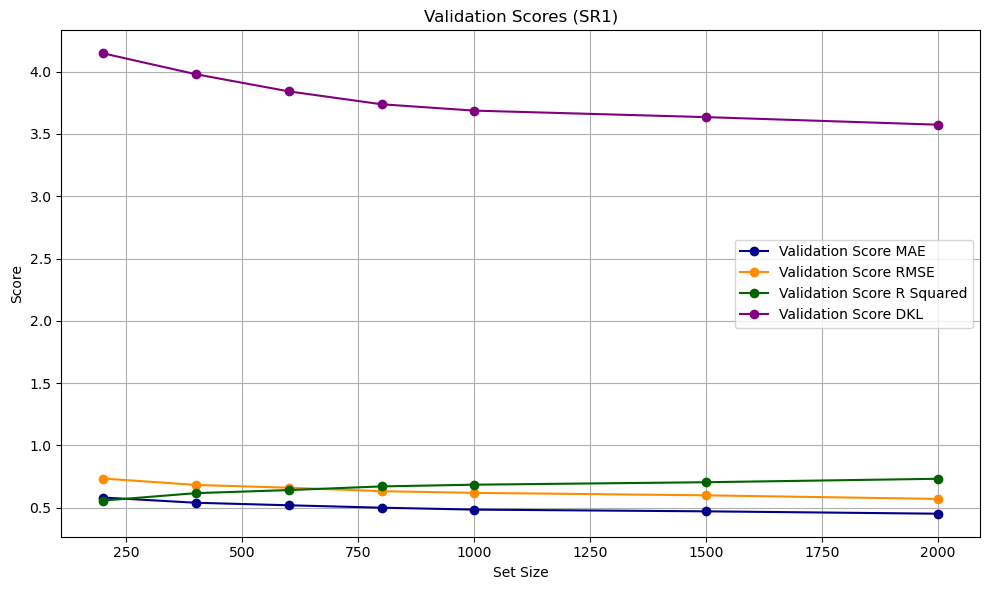

In [11]:
import matplotlib.pyplot as plt

# Define the data structure
data_structures = {
    '200': cv_score_SR1_200_val,
    '400': cv_score_SR1_400_val,
    '600': cv_score_SR1_600_val,
    '800': cv_score_SR1_800_val,
    '1000': cv_score_SR1_1000_val,
    '1500': cv_score_SR1_1500_val,
    '2000': cv_score_SR1_2000_val
}

# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(10, 6))

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  # Extract scores for each set size
    plt.plot(set_sizes, score_values, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Validation Scores (SR1)')
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


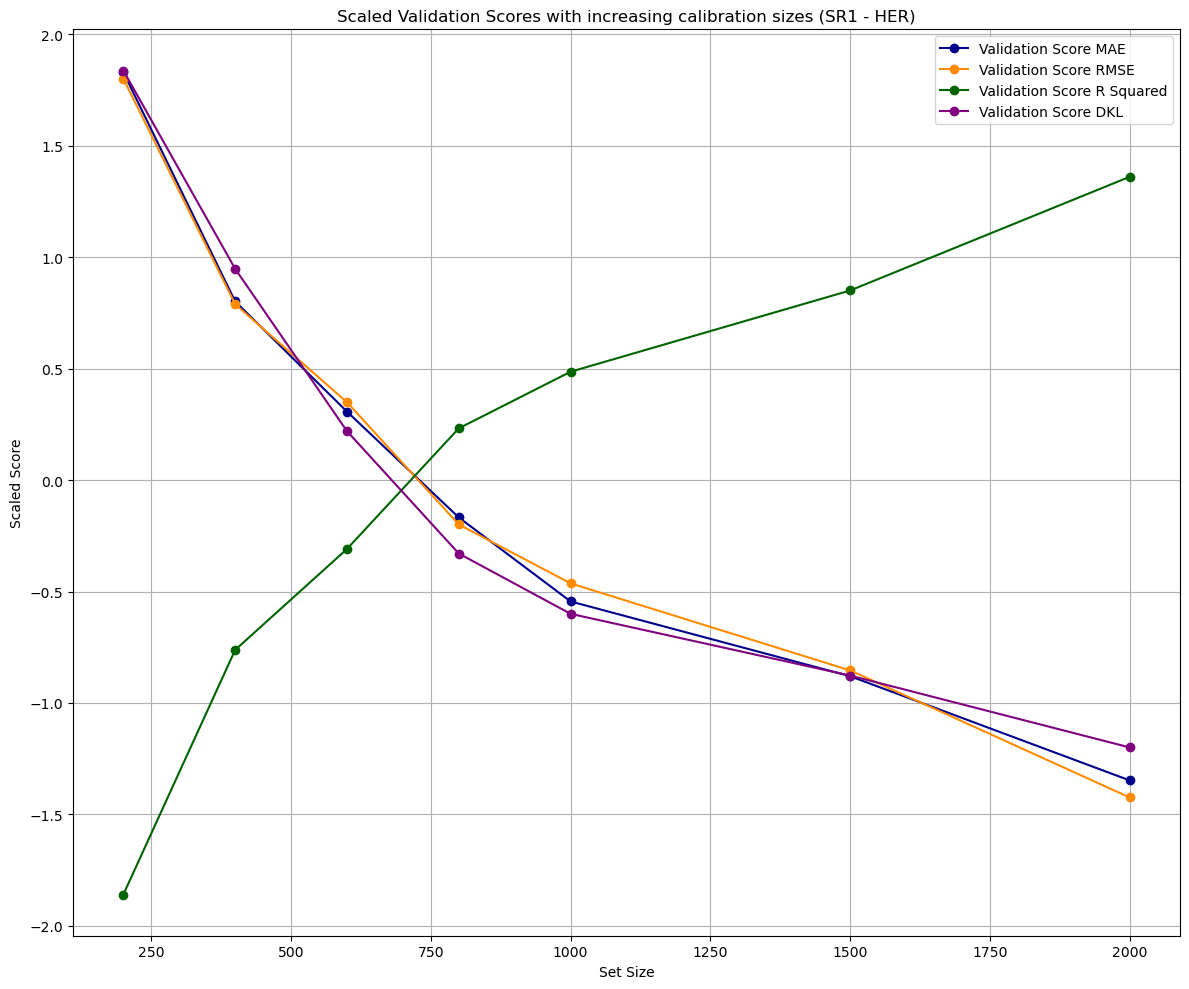

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the data structure
data_structures = {
    '200': cv_score_SR1_200_val,
    '400': cv_score_SR1_400_val,
    '600': cv_score_SR1_600_val,
    '800': cv_score_SR1_800_val,
    '1000': cv_score_SR1_1000_val,
    '1500': cv_score_SR1_1500_val,
    '2000': cv_score_SR1_2000_val
}

# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(12, 10))

# Initialize StandardScaler
scaler = StandardScaler()

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    # Extract scores for each set size and scale them
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  
    scaled_scores = scaler.fit_transform([[value] for value in score_values])
    
    # Plot scaled scores
    plt.plot(set_sizes, scaled_scores, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Scaled Validation Scores with increasing calibration sizes (SR1 - HER)')
plt.xlabel('Set Size')
plt.ylabel('Scaled Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


# LR0

In [12]:
cv_score_LR0_200_val = {
        "Validation Score RMSE": 0.1866,
        "Validation Score ME": -0.0195,
        "Validation Score MAE": 0.1304,
        "Validation Score R Squared": 0.9572,
        "Validation Score DKL": 1.7951
}
cv_score_LR0_400_val = {
        "Validation Score RMSE":0.1133,
        "Validation Score ME": 0.0011,
        "Validation Score MAE": 0.0808,
        "Validation Score R Squared": 0.9842,
        "Validation Score DKL": 1.2466
}
cv_score_LR0_600_val = {
        "Validation Score RMSE":0.1008,
        "Validation Score ME": 0.0001,
        "Validation Score MAE": 0.0696,
        "Validation Score R Squared": 0.9875,
        "Validation Score DKL": 1.0960
}
cv_score_LR0_800_val = {
        "Validation Score RMSE":0.0951,
        "Validation Score ME": 0.0007,
        "Validation Score MAE": 0.0629,
        "Validation Score R Squared": 0.9889,
        "Validation Score DKL": 0.9911
}
cv_score_LR0_1000_val = {
        "Validation Score RMSE":0.0776,
        "Validation Score ME": 0.0024,
        "Validation Score MAE": 0.0538,
        "Validation Score R Squared":0.9926,
        "Validation Score DKL": 0.8609
}
cv_score_LR0_1500_val = {
        "Validation Score RMSE":0.0641,
        "Validation Score ME": 0.0035,
        "Validation Score MAE": 0.0461,
        "Validation Score R Squared":0.9950,
        "Validation Score DKL": 0.7245
}
cv_score_LR0_2000_val = {
        "Validation Score RMSE":0.0526,
        "Validation Score ME": 0.0012,
        "Validation Score MAE": 0.0397,
        "Validation Score R Squared":0.9966,
        "Validation Score DKL": 0.6218
}

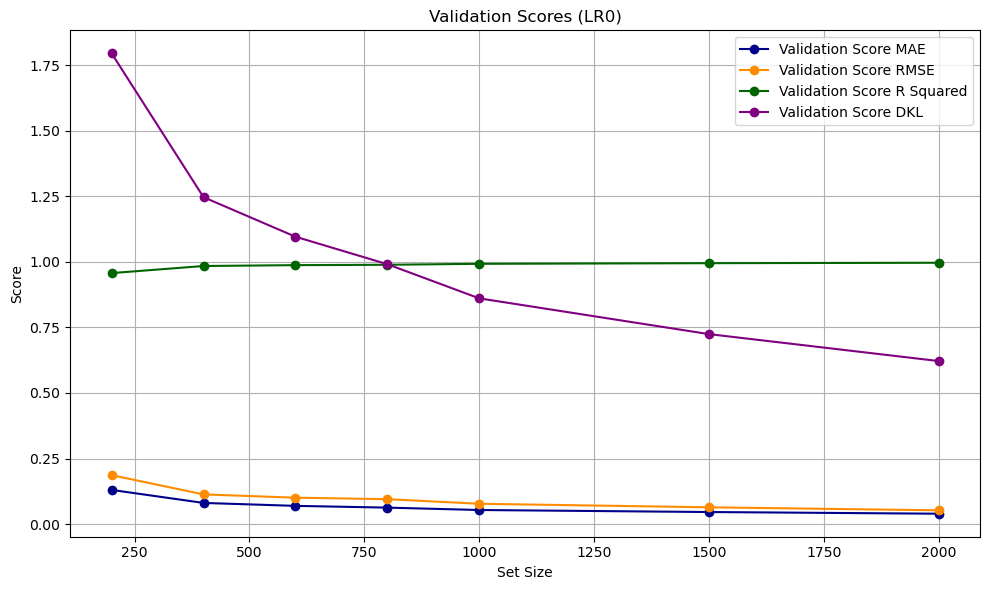

In [14]:
# Define the data structure
data_structures = {
    '200': cv_score_LR0_200_val,
    '400': cv_score_LR0_400_val,
    '600': cv_score_LR0_600_val,
    '800': cv_score_LR0_800_val,
    '1000': cv_score_LR0_1000_val,
    '1500': cv_score_LR0_1500_val,
    '2000': cv_score_LR0_2000_val
}

# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(10, 6))

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  # Extract scores for each set size
    plt.plot(set_sizes, score_values, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Validation Scores (LR0)')
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

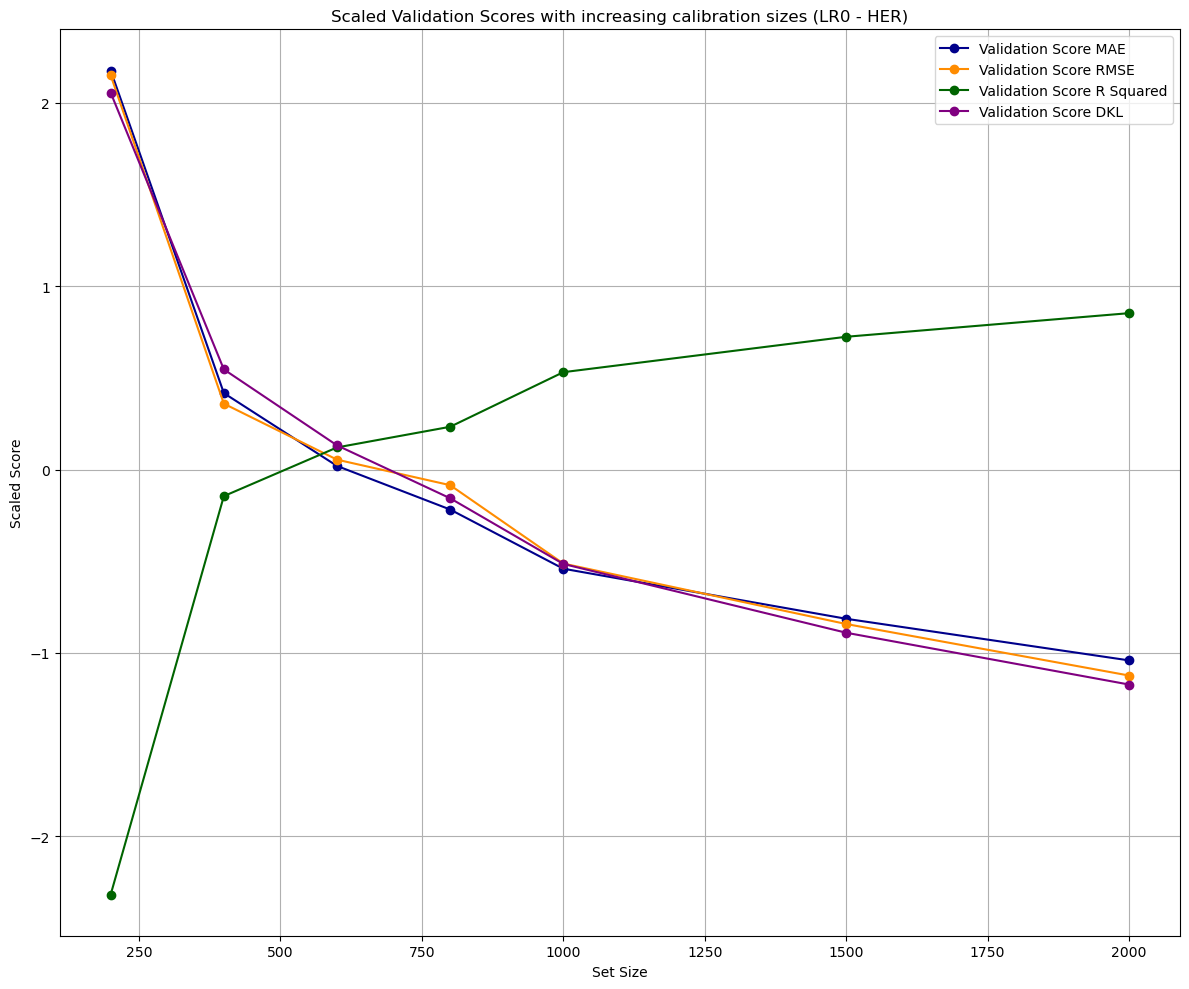

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the data structure
data_structures = {
    '200': cv_score_LR0_200_val,
    '400': cv_score_LR0_400_val,
    '600': cv_score_LR0_600_val,
    '800': cv_score_LR0_800_val,
    '1000': cv_score_LR0_1000_val,
    '1500': cv_score_LR0_1500_val,
    '2000': cv_score_LR0_2000_val
}

# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(12, 10))

# Initialize StandardScaler
scaler = StandardScaler()

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    # Extract scores for each set size and scale them
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  
    scaled_scores = scaler.fit_transform([[value] for value in score_values])
    
    # Plot scaled scores
    plt.plot(set_sizes, scaled_scores, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Scaled Validation Scores with increasing calibration sizes (LR0 - HER)')
plt.xlabel('Set Size')
plt.ylabel('Scaled Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


# LR1

In [15]:
cv_score_LR1_200_val = {
        "Validation Score RMSE":0.5756,
        "Validation Score ME": 0.0342,
        "Validation Score MAE": 0.4542,
        "Validation Score R Squared": 0.6972,
        "Validation Score DKL": 3.7522
}
cv_score_LR1_400_val = {
        "Validation Score RMSE":0.5659,
        "Validation Score ME": 0.0592,
        "Validation Score MAE": 0.4473,
        "Validation Score R Squared": 0.7073,
        "Validation Score DKL": 3.6345
}
cv_score_LR1_600_val = {
        "Validation Score RMSE":0.5441,
        "Validation Score ME": 0.0472,
        "Validation Score MAE": 0.4295,
        "Validation Score R Squared": 0.7295,
        "Validation Score DKL": 3.5249
}
cv_score_LR1_800_val = {
        "Validation Score RMSE":0.5473,
        "Validation Score ME": 0.0235,
        "Validation Score MAE": 0.4327,
        "Validation Score R Squared": 0.7262,
        "Validation Score DKL": 3.5205
}
cv_score_LR1_1000_val = {
        "Validation Score RMSE":0.5456,
        "Validation Score ME": 0.0310,
        "Validation Score MAE": 0.4288,
        "Validation Score R Squared":0.7279,
        "Validation Score DKL": 3.5082
}
cv_score_LR1_1500_val = {
        "Validation Score RMSE":0.5441,
        "Validation Score ME": 0.0225,
        "Validation Score MAE": 0.4300,
        "Validation Score R Squared":0.7295,
        "Validation Score DKL": 3.5059
}
cv_score_LR1_2000_val = {
        "Validation Score RMSE":0.5274,
        "Validation Score ME": 0.0224,
        "Validation Score MAE": 0.4188,
        "Validation Score R Squared":0.7458,
        "Validation Score DKL": 3.4649
}

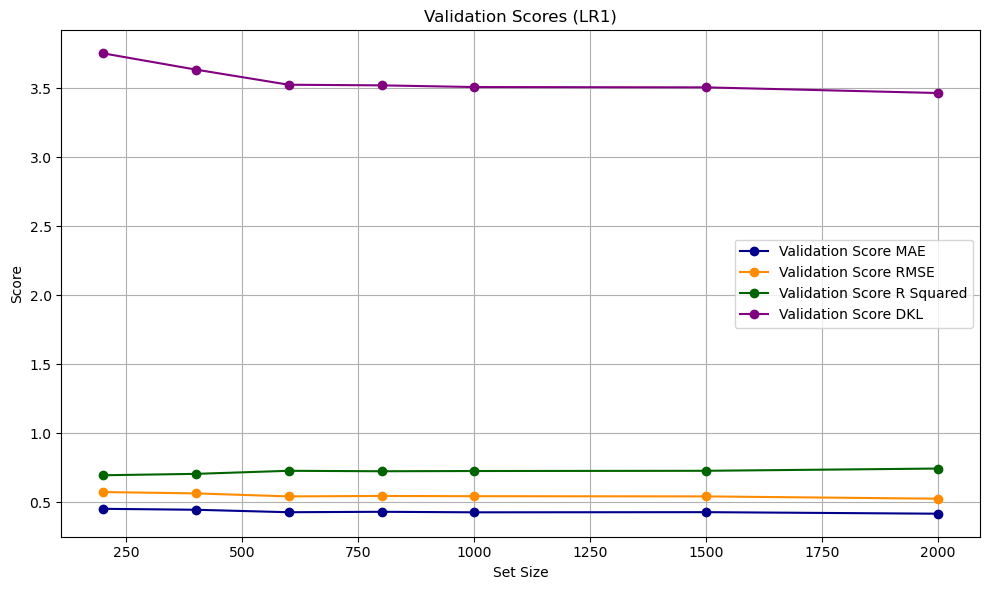

In [3]:
import matplotlib.pyplot as plt
# Define the data structure
data_structures = {
    '200': cv_score_LR1_200_val,
    '400': cv_score_LR1_400_val,
    '600': cv_score_LR1_600_val,
    '800': cv_score_LR1_800_val,
    '1000': cv_score_LR1_1000_val,
    '1500': cv_score_LR1_1500_val,
    '2000': cv_score_LR1_2000_val
}

# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(10, 6))

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  # Extract scores for each set size
    plt.plot(set_sizes, score_values, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Validation Scores (LR1)')
plt.xlabel('Set Size')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

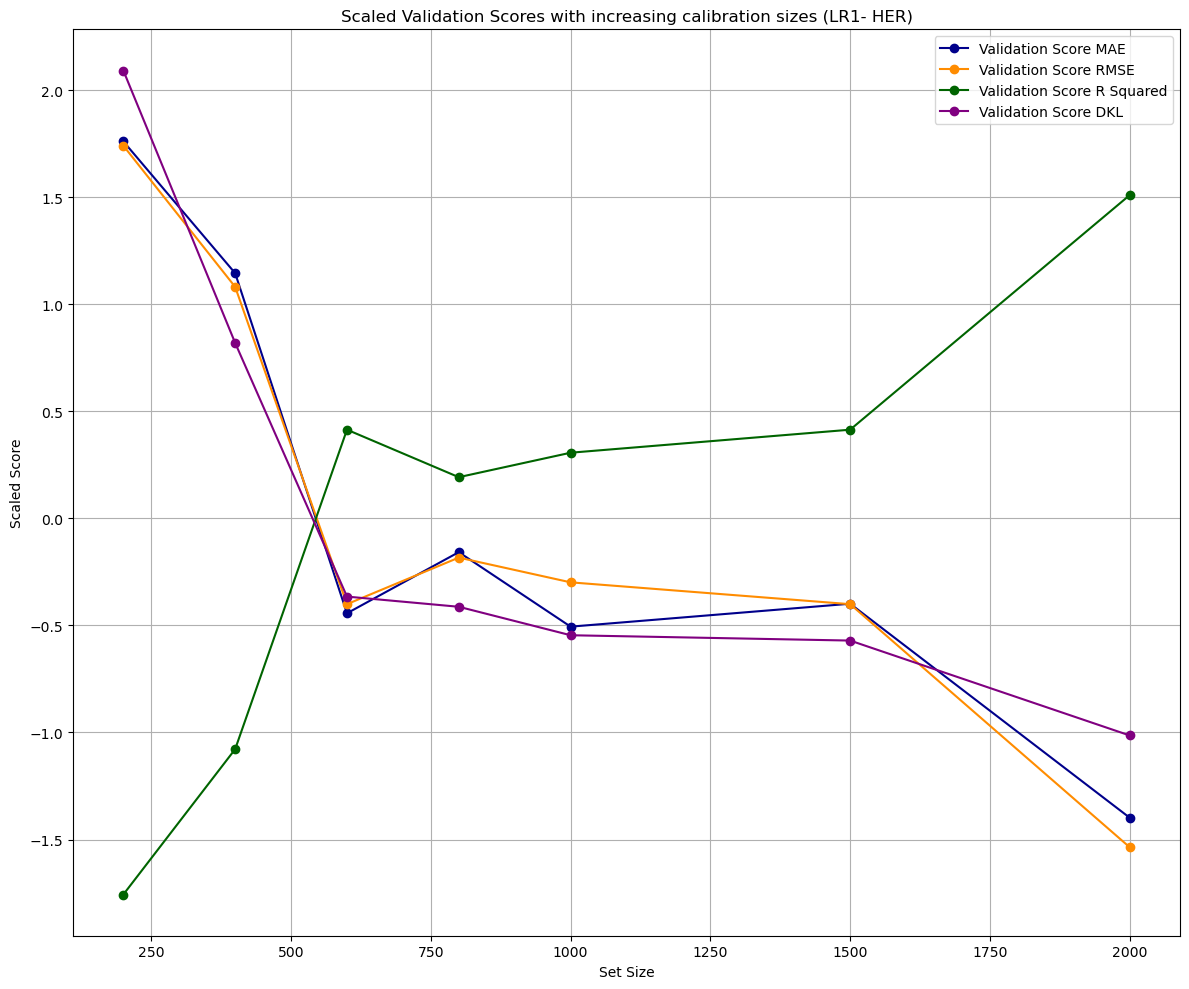

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the data structure
data_structures = {
    '200': cv_score_LR1_200_val,
    '400': cv_score_LR1_400_val,
    '600': cv_score_LR1_600_val,
    '800': cv_score_LR1_800_val,
    '1000': cv_score_LR1_1000_val,
    '1500': cv_score_LR1_1500_val,
    '2000': cv_score_LR1_2000_val
}


# Define validation scores and colors
validation_scores = ['Validation Score MAE', 'Validation Score RMSE', 'Validation Score R Squared', 'Validation Score DKL']
colors = ['darkblue', 'darkorange', 'darkgreen', 'purple']

# Create a single plot
plt.figure(figsize=(12, 10))

# Initialize StandardScaler
scaler = StandardScaler()

# Extract set sizes from the keys
set_sizes = [int(size) for size in data_structures.keys()]

# Plot each validation score
for score, color in zip(validation_scores, colors):
    # Extract scores for each set size and scale them
    score_values = [data_structures[str(set_size)][score] for set_size in set_sizes]  
    scaled_scores = scaler.fit_transform([[value] for value in score_values])
    
    # Plot scaled scores
    plt.plot(set_sizes, scaled_scores, label=score, color=color, marker='o')

# Set plot labels and legend
plt.title('Scaled Validation Scores with increasing calibration sizes (LR1- HER)')
plt.xlabel('Set Size')
plt.ylabel('Scaled Score')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
